## Ideal Case: Circular Orbit, no Limb Darkening

### Imports:

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import seaborn as sns
sns.set()
from matplotlib import style
style.use('seaborn-talk')

### Assume a Sun-Jupiter system with inclination $i \approx \pi/2$:

In [2]:
#Subscript: s = star, p = planet
G = 6.673e-11
R_s = 696340000 #parameter
M_s = 1.989e30 #parameter
a = 778000000000 #parameter
R_p = 69911000 #parameter
i = 0.9998*np.pi/2 #parameter- t_T and t_F exist only for i close to pi/2

In [3]:
b = a*np.cos(i)/R_s
delta = (R_p/R_s)**2

P = 2*np.pi*np.sqrt(a**3/(G*M_s)) #Kepler's Third Law

#The following formulae have been taken from the thesis:
t_T = P/np.pi*np.arcsin(R_s*np.sqrt(np.abs((1+R_p/R_s)**2-b**2))/(a*np.sin(i)))
t_F = P/np.pi*np.arcsin(np.sin(np.pi*t_T/P)*np.sqrt(((1-R_p/R_s)-b**2)/((1+R_p/R_s)-b**2)))
tau = t_T - t_F

### Assume luminosity variation during ingress and egress is linear:

In [4]:
time = np.linspace(0,3*P,num = 50000, endpoint=False) #Taking 50000 data points to avoid floating point errors
l = np.array([]) # ratio of luminosities

#for loop takes a few seconds
for t in time%P: #construct a piece-wise function
    if(t<tau/2):
        l = np.append(l,1-(2*delta/tau)*(t))
    elif(t>=tau/2 and t<tau/2+t_F):
        l = np.append(l,1 - delta)
    elif(t>=t_T-tau and t<t_T):
        l = np.append(l,1+(2*delta)/(tau)*(t-t_T))
    elif(t>=t_T):
        l = np.append(l,1)

### Plot the idealised transit light curve:

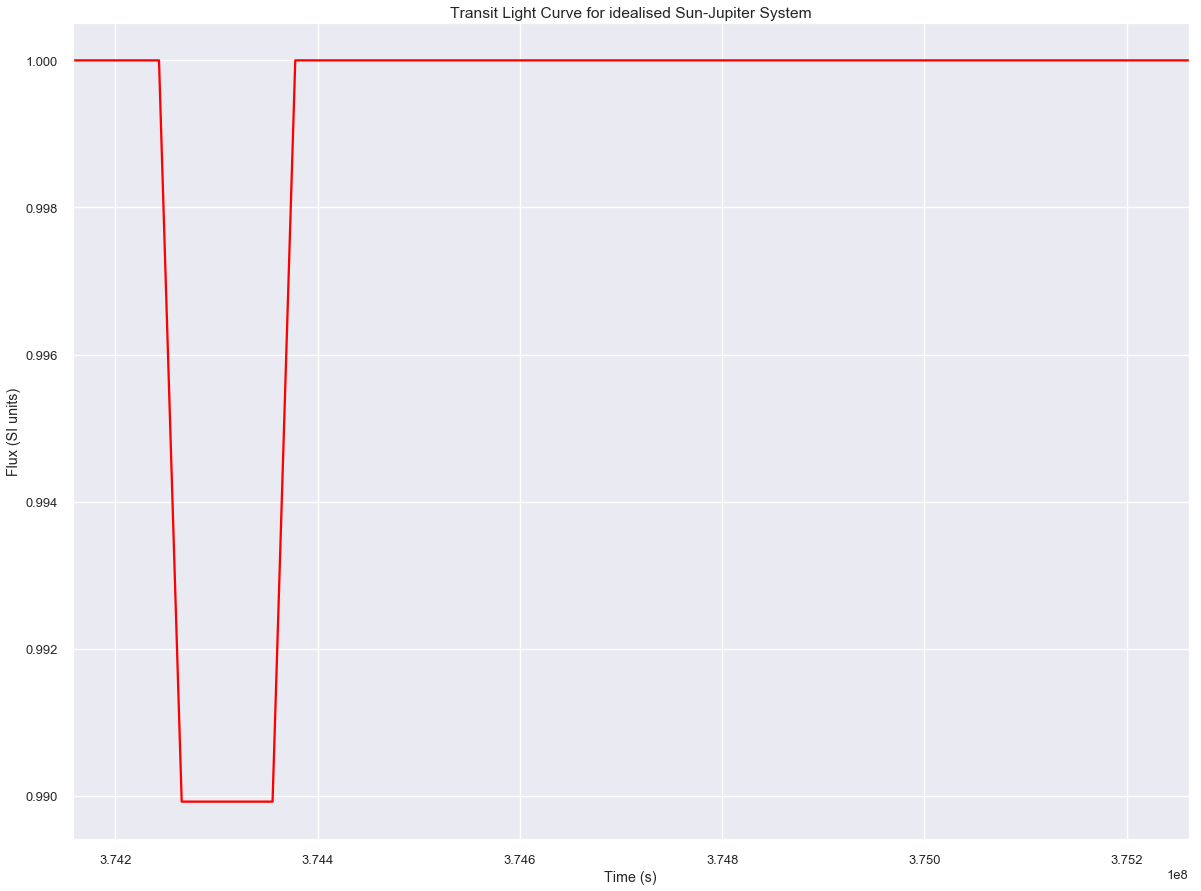

In [5]:
fig = plt.figure(figsize=(20,15))
plt.plot(time,l, c = 'red')
plt.title('Transit Light Curve for idealised Sun-Jupiter System')
plt.xlabel('Time (s)')
plt.ylabel('Flux (SI units)')
plt.xlim(P-0.000268*P,P+0.00268*P)
plt.show()